In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse,signal,interpolate
from numpy import polynomial

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import sys
sys.path.insert(0, '..')

from partial_trace import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2
import os

In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font',size=10)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

$\renewcommand{\vec}{\mathbf}$

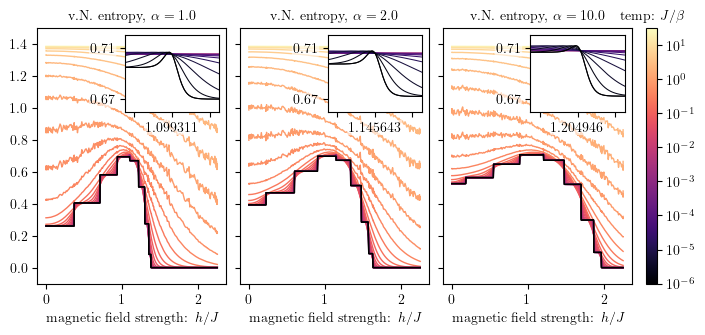

In [65]:
fig,axs = plt.subplots(1,4,figsize=(8,3.5),gridspec_kw={'width_ratios': [1,1,1,.06]})

αs = [1.,2.,10.]
plt.subplots_adjust(bottom=.15,wspace=.1)

for αi,α in enumerate(αs):
    
    directory = f'data/data_16N/data/chain_{α}'
    
    # load parameters
    [s,N,N_s] = np.load(f'{directory}/dimensions.npy',allow_pickle=True)
    N = int(N)
    N_s = int(N_s)
    
    out_all = []
    hs = []
    for file in os.listdir(f'{directory}/data'):
        
        # only look at npy files
        if file[-4:] != '.npy':
            continue
        
        data = np.load(f'{directory}/data/{file}',allow_pickle=True).item()
        hs.append(data['h'])
        out_all.append(data['out'])
    
    hs,out_all = zip(*sorted(zip(hs,out_all)))
    hs = np.array(hs)
    
    
    n_βs = 30
    βs = np.hstack([[1e8,1e6],1/np.logspace(-3,1.5,n_βs-1)])

    vN_entropy_all = []
    for hi,h in enumerate(hs):
    
        (Λk,Tr_defl),(Θs,Tr_rems) = out_all[hi]
        E0 = Λk[0]
    
        vN_entropy = get_vN_entropy(Λk,Tr_defl,Θs,Tr_rems,E0,βs)
        vN_entropy_all.append(vN_entropy)
    
    hs_full = np.linspace(hs[0],hs[-1],500)
    
    turning_points = np.load(f'{directory}/turning_points.npy')
    
    βs_to_int = lambda β,βmax=βs[1],βmin=βs[-1]: (np.log10(βmax) - np.log10(β)) / (np.log10(βmax)-np.log10(βmin))

    for l,β in enumerate(βs):
        c = (plt.cm.magma(βs_to_int(β)) if l>0 else 'k')
    
        # get y values for a single temperature
        y = np.array(vN_entropy_all)[:,l]
        axs[αi].plot(hs,y,color=c,lw=1,zorder=-l)
    

    cmap = plt.get_cmap('magma')
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    Ts = np.array([1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2])
    cbar = plt.colorbar(sm,ticks=βs_to_int(1/Ts),cax=axs[-1])
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(T))}}}$' for T in Ts]);  # vertically oriented colorbar
    axs[-1].set_title('temp: $J/\\beta$',fontsize=10)
    

    axs[αi].set_ylim(-.1,1.5)
    axs[αi].set_xlabel('magnetic field strength: $h/J$')
        
#    axs[αi].text(.95,.95,rf'$\alpha={α}$',ha='right', va='top', transform=axs[αi].transAxes,bbox=dict(facecolor='white',edgecolor='none',pad=2))

    if αi>0:
        axs[αi].set_yticklabels([])

    axs[αi].set_title(rf'v.N. entropy, $\alpha={α}$',fontsize=10)





    

    axins = inset_axes(axs[αi], "50%","30%", loc='upper right', borderpad=.5) # zoom = 6
    # axins.yaxis.set_label_position("right")
    # axins.yaxis.tick_right()

    directory = f'data/data_spike/data/chain_{α}'
        
    # load parameters
    [s,N,N_s] = np.load(f'{directory}/dimensions.npy',allow_pickle=True)
    N = int(N)
    N_s = int(N_s)
    
    out_all = []
    hs = []
    for file in os.listdir(f'{directory}/data'):
        
        # only look at npy files
        if file[-4:] != '.npy':
            continue
        
        data = np.load(f'{directory}/data/{file}',allow_pickle=True).item()
        hs.append(data['h'])
        out_all.append(data['out'])
    
    hs,out_all = zip(*sorted(zip(hs,out_all)))
    hs = np.array(hs)
    
    
    n_βs = 15
    βs = np.hstack([[1e6],1/np.logspace(-6,-2,n_βs)])

    
    vN_entropy_all = []
    for hi,h in enumerate(hs):
    
        (Λk,Tr_defl),(Θs,Tr_rems) = out_all[hi]
        E0 = Λk[0]
    
        vN_entropy = get_vN_entropy(Λk,Tr_defl,Θs,Tr_rems,E0,βs)
        vN_entropy_all.append(vN_entropy)
    
    hs_full = np.linspace(hs[0],hs[-1],500)
    
#    turning_points = np.load(f'{directory}/turning_points.npy')
    
    # βs_to_int = lambda β: (np.log10(βs[1]) - np.log10(β)) / (np.log10(βs[1])-np.log10(βs[-1]))

    for l,β in enumerate(βs):
        c = plt.cm.magma(βs_to_int(β))
    
        # get y values for a single temperature
        y = np.array(vN_entropy_all)[:,l]
        axins.plot(hs,y,color=c,lw=.75,zorder=-l)

    if α == 1.0:
        x = 1.099311
    elif α == 2.0:
        x = 1.145643
    elif α == 10.0:
        x = 1.204946

    x1 = x-5e-6
    x2 = x+5e-6

    
    δ = 4
    xticks = [x-δ*1e-6,x,x+δ*1e-6]
    axins.set_xticks(xticks)
    axins.set_xticklabels(['',f'{x:1.6f}',''])

    y1,y2 = .66,.72
    # x1,x2 = 1.18,1.23
    # y1,y2 = .66,.72
    
#    axs[αi].add_patch(Rectangle((x1,y1),x2-x1,y2-y1,fill=False,ls=':',zorder=100))
#    axins.axvline(x)
    axins.set_xlim(x1,x2)
    axins.set_ylim(y1,y2)
    axins.set_yticks([.67,.71])

    bs = mpl.patches.BoxStyle.Round(pad=.1)
    bbox = dict(boxstyle=bs, ec="None", fc="white", alpha=0.6)
    plt.setp(axins.get_xticklabels(), bbox=bbox)
    plt.setp(axins.get_yticklabels(), bbox=bbox)

plt.savefig(f'imgs/vN_phase_alpha.pdf')

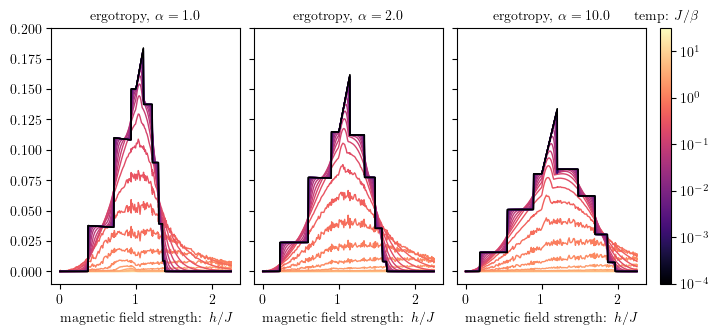

In [191]:
fig,axs = plt.subplots(1,4,figsize=(8,3.5),gridspec_kw={'width_ratios': [1,1,1,.06]})

αs = [1.,2.,10.]
plt.subplots_adjust(bottom=.15,wspace=.1)

for αi,α in enumerate(αs):
    
    directory = f'data/data_16N/data/chain_{α}'
    
    # load parameters
    [s,N,N_s] = np.load(f'{directory}/dimensions.npy',allow_pickle=True)
    N = int(N)
    N_s = int(N_s)


    [Jx,Jy,Jz] = np.load(f'{directory}/couplings.npy',allow_pickle=True)

    H1 = get_hamiltonian(Jx[:N_s,:N_s],Jy[:N_s,:N_s],Jz[:N_s,:N_s],0,s)
    H2 = get_hamiltonian(0*Jx[:N_s,:N_s],0*Jx[:N_s,:N_s],0*Jx[:N_s,:N_s],1,s)
    
    out_all = []
    hs = []
    for file in os.listdir(f'{directory}/data'):
        
        # only look at npy files
        if file[-4:] != '.npy':
            continue
        
        data = np.load(f'{directory}/data/{file}',allow_pickle=True).item()
        hs.append(data['h'])
        out_all.append(data['out'])
    
    hs,out_all = zip(*sorted(zip(hs,out_all)))
    hs = np.array(hs)
    
    
    n_βs = 30
    βs = np.hstack([[1e5,1e4],1/np.logspace(-3,1.5,n_βs-2)])
    
    ergotropy_all = []
    for hi,h in enumerate(hs):
    
        (Λk,Tr_defl),(Θs,Tr_rems) = out_all[hi]
        E0 = Λk[0]

        Hs = H1 + h*H2
        ergotropy_all.append(get_ergotropy_all(Hs,Λk,Tr_defl,Θs,Tr_rems,E0,βs))
    

    hs_full = np.linspace(hs[0],hs[-1],500)
    
    turning_points = np.load(f'{directory}/turning_points.npy')
    
    βs_to_int = lambda β: (np.log10(βs[1]) - np.log10(β)) / (np.log10(βs[1])-np.log10(βs[-1]))
        
    for l,β in enumerate(βs):
        c = (plt.cm.magma(βs_to_int(β)) if l>0 else 'k')
    
        # get y values for a single temperature
        y = np.array(ergotropy_all)[:,l]
        #axs[αi].plot(hs,y,color=c,ls='None',marker='.',ms=3,alpha=.5,markeredgewidth=0,zorder=-l)
        # if β < 1e0:
        #     deg = 20
        #     p = polynomial.chebyshev.Chebyshev.fit(hs,y,deg)
        #     axs[αi].plot(hs_full,p(hs_full),color=c,lw=1,zorder=-l)

        # elif β < 5e2:
        #     tck = sp.interpolate.splrep(hs,y,s=0)
        #     axs[αi].plot(hs_full,sp.interpolate.BSpline(*tck)(hs_full),color=c,lw=1,zorder=-l)
        # else:
        #     
        axs[αi].plot(hs,y,color=c,lw=1,zorder=-l)
    

    cmap = plt.get_cmap('magma')
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    Ts = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1])
    cbar = plt.colorbar(sm,ticks=βs_to_int(1/Ts),cax=axs[-1])
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(T))}}}$' for T in Ts]);  # vertically oriented colorbar
    axs[-1].set_title('temp: $J/\\beta$',fontsize=10)
    

    axs[αi].set_ylim(-.01,.2)
    axs[αi].set_xlabel('magnetic field strength: $h/J$')
        
    if αi>0:
        axs[αi].set_yticklabels([])

    axs[αi].set_title(rf'ergotropy, $\alpha={α}$',fontsize=10)


plt.savefig(f'imgs/ergotropy_phase_alpha.pdf')

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(8,3.5),gridspec_kw={'width_ratios': [1,1,1,.06]})

αs = [1.,2.,10.]
plt.subplots_adjust(bottom=.2,wspace=.1)

for αi,α in enumerate(αs):
    
    directory = f'data/data_spike/data/chain_{α}'
    
    # load parameters
    [s,N,N_s] = np.load(f'{directory}/dimensions.npy',allow_pickle=True)
    N = int(N)
    N_s = int(N_s)
    
    out_all = []
    hs = []
    for file in os.listdir(f'{directory}/data'):
        
        # only look at npy files
        if file[-4:] != '.npy':
            continue
        
        data = np.load(f'{directory}/data/{file}',allow_pickle=True).item()
        hs.append(data['h'])
        out_all.append(data['out'])
    
    hs,out_all = zip(*sorted(zip(hs,out_all)))
    hs = np.array(hs)
    
    
    n_βs = 15
    βs = np.hstack([[1e6],1/np.logspace(-6,-2,n_βs)])

    
    
    vN_entropy_all = []
    for hi,h in enumerate(hs):
    
        (Λk,Tr_defl),(Θs,Tr_rems) = out_all[hi]
        E0 = Λk[0]
    
        vN_entropy = get_vN_entropy(Λk,Tr_defl,Θs,Tr_rems,E0,βs)
        vN_entropy_all.append(vN_entropy)
    
    hs_full = np.linspace(hs[0],hs[-1],500)
    
    turning_points = np.load(f'{directory}/turning_points.npy')
    
    βs_to_int = lambda β: (np.log10(βs[1]) - np.log10(β)) / (np.log10(βs[1])-np.log10(βs[-1]))

    for l,β in enumerate(βs):
        c = (plt.cm.magma(βs_to_int(β)) if l>0 else 'k')
    
        # get y values for a single temperature
        y = np.array(vN_entropy_all)[:,l]
        axs[αi].plot(hs,y,color=c,lw=1,zorder=-l)
    

    cmap = plt.get_cmap('magma')
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    Ts = np.array([1e-6,1e-5,1e-4,1e-3,1e-2])
    cbar = plt.colorbar(sm,ticks=βs_to_int(1/Ts),cax=axs[-1])
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(T))}}}$' for T in Ts]);  # vertically oriented colorbar
    axs[-1].set_title('temp: $J/\\beta$',fontsize=10)

    axs[αi].set_ylim(.66,.72)
    axs[αi].set_xlabel('magnetic field strength: $h/J$')
    xticks = [hs[len(hs)//4],hs[3*len(hs)//4]]
    axs[αi].set_xticks(xticks)
    axs[αi].set_xticklabels([f'{tick:1.5f}' for tick in xticks])
    
    axs[αi].text(.95,.95,rf'$\alpha={α}$',ha='right', va='top', transform=axs[αi].transAxes,bbox=dict(facecolor='white',edgecolor='none',pad=2))

    if αi>0:
        axs[αi].set_yticklabels([])

    axs[αi].set_title('von Neumann entropy',fontsize=10)

plt.savefig(f'imgs/vN_phase_alpha_spike.pdf')